In [40]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
# np.random.seed(3)

In [41]:
def generate_oe_matrix(variance_threshold_L = 0.85, variance_threshold_U = 1):
    """
        Generates a random 5x5 symmetric matrix with positive values and
        the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(5, 5) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix.copy()

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = deepcopy(np.corrcoef(oe))
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.8591757864547463 

[[57.00265 14.68851 27.39731  7.87303  9.17188]
 [14.68851  7.45221  8.64881 15.41813  4.57341]
 [27.39731  8.64881 11.97033 19.73638 14.08742]
 [ 7.87303 15.41813 19.73638 18.60244 16.81193]
 [ 9.17188  4.57341 14.08742 16.81193 16.06071]] 



#### Perform PCA on the Pearson correlation matrix <br>

In [42]:
n = len(corr_oe_zero[0])
x_t = deepcopy(np.transpose(corr_oe_zero))
y = deepcopy(x_t / np.sqrt(n))

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

#### Notes 
I don't know why but the last explained variance is always 0.

In [43]:
print('explained variances')
print(explained_variances, '\n')
# print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
# print((V_Cx > 0) == (Vh > 0), '\n')

print("V")
print(V_Cx, '\n')
# print(V_Cx > 0, '\n')
print("P transpose")
print(np.transpose(Vh), '\n')
print("P")
print(Vh, '\n')
# print(Vh > 0, '\n')

explained variances
[0.89411 0.08256 0.02252 0.00081 0.     ] 

V
[[-0.82589 -0.53996 -0.71604  0.88337  0.45547]
 [ 0.0343  -0.0672  -0.07152 -0.01529 -0.10027]
 [ 0.01294 -0.02902  0.00741 -0.01001  0.02012]
 [-0.00107 -0.0003   0.0003  -0.00081 -0.00026]
 [-0.      -0.      -0.       0.       0.     ]] 

P transpose
[[-0.52506  0.23612  0.32668 -0.74865  0.03701]
 [-0.34328 -0.46269 -0.73255 -0.21023  0.29538]
 [-0.45522 -0.49243  0.18702  0.21165 -0.68594]
 [ 0.5616  -0.10526 -0.25259 -0.564   -0.54003]
 [ 0.28957 -0.69036  0.50781 -0.18013  0.38631]] 

P
[[-0.52506 -0.34328 -0.45522  0.5616   0.28957]
 [ 0.23612 -0.46269 -0.49243 -0.10526 -0.69036]
 [ 0.32668 -0.73255  0.18702 -0.25259  0.50781]
 [-0.74865 -0.21023  0.21165 -0.564   -0.18013]
 [ 0.03701  0.29538 -0.68594 -0.54003  0.38631]] 



In [44]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.       0.4354   0.66612 -0.80099 -0.36569]
 [ 0.4354   1.       0.77662 -0.36004  0.06933]
 [ 0.66612  0.77662  1.      -0.68759  0.15678]
 [-0.80099 -0.36004 -0.68759  1.       0.52906]
 [-0.36569  0.06933  0.15678  0.52906  1.     ]] 

V_Cx[0]
[-0.82589 -0.53996 -0.71604  0.88337  0.45547] 

Vh[0]
[-0.52506 -0.34328 -0.45522  0.5616   0.28957] 

cov_x
[[ 0.44676  0.25839  0.36127 -0.4701  -0.25606]
 [ 0.25839  0.23777  0.2734  -0.28867 -0.12464]
 [ 0.36127  0.2734   0.36262 -0.39664 -0.15426]
 [-0.4701  -0.28867 -0.39664  0.5007   0.26141]
 [-0.25606 -0.12464 -0.15426  0.26141  0.21138]] 

cov_x_sum
[1.792578987648711, 1.1828811869698768, 1.54819136667857, 1.9175240095466752, 1.0077508316850912] 



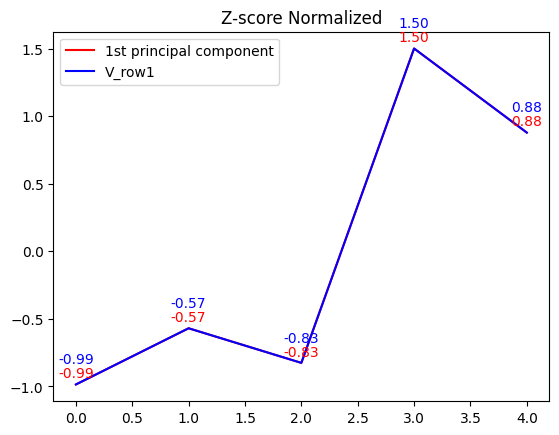

In [45]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
# plt.plot(cov_x_selected_Norm, c="black")

plt.title("Z-score Normalized")
plt.legend(["1st principal component", "V_row1"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_Norm_xs = np.arange(0,5,1)
for x, y in zip(Vh0_Norm_xs, Vh0_Norm):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

V_Cx0_Norm_xs = np.arange(0,5,1)
for x, y in zip(V_Cx0_Norm_xs, V_Cx0_Norm):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 15), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [46]:
plt.clf()

<Figure size 640x480 with 0 Axes>

### Check the plot without Normalization on the Pearson correlation matrix

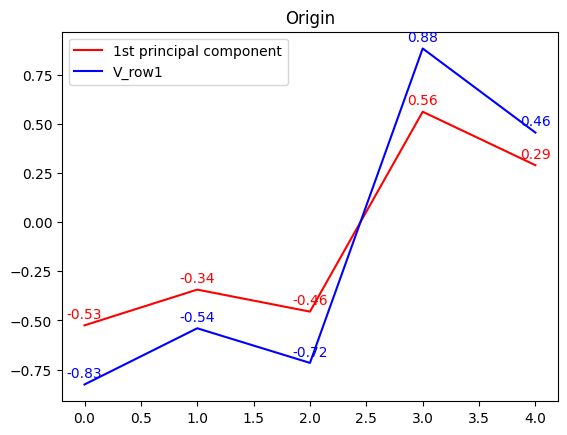

In [47]:
plt.plot(Vh[0], c="red")
plt.plot(V_Cx[0], c="blue")
# plt.plot(cov_x_selected, c="black")

plt.title("Origin")
plt.legend(["1st principal component", "V_row1"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_xs = np.arange(0,5,1)
for x, y in zip(Vh0_xs, Vh[0]):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

V_Cx0_xs = np.arange(0,5,1)
for x, y in zip(V_Cx0_xs, V_Cx[0]):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [48]:
plt.clf()

<Figure size 640x480 with 0 Axes>

#### Heatmap plot

<Axes: >

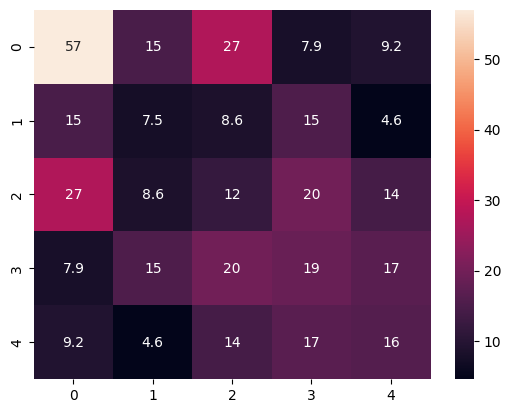

In [49]:
sns.heatmap(oe, annot=True)

<Axes: >

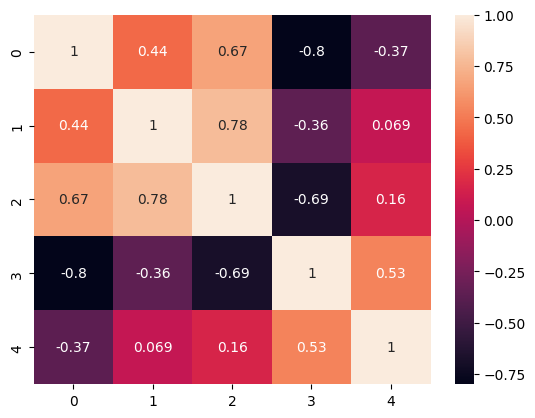

In [50]:
sns.heatmap(corr_oe, annot=True)

In [51]:
# sns.heatmap(corr_oe_zero, annot=True)

<Axes: >

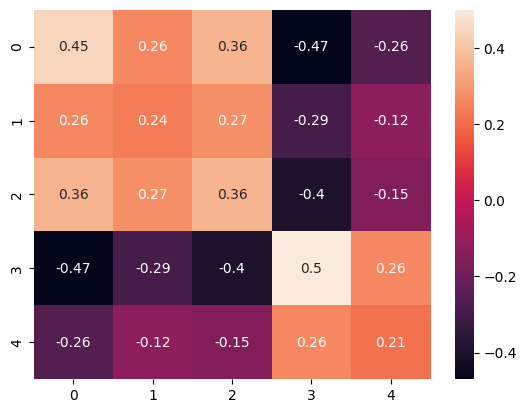

In [52]:
sns.heatmap(cov_x, annot=True)